In [1]:
import csv
import pandas as pd
df = pd.read_csv("rerun.csv")
df = df.sort_values(by=['zeta'], ascending=False)
df.head()

,tid,period,zeta,deltchi2,kurtosis,sector
240136,25133286,14.72240,2830930.0,91092.70,9689.2000,9
116431,272551828,11.06230,185412.0,308140.00,7490.4200,3
149651,468887783,4.52917,116034.0,8200.27,119.6170,5
136393,301022235,14.97740,110065.0,23393.80,35.3918,4
71262,167692429,10.28010,107016.0,1515.60,163.9280,12


In [2]:
tois = pd.read_csv("tois.csv")['tid'].tolist()
ebs = pd.read_csv("ebs.csv")['tid'].tolist()
print(len(tois))
print(len(ebs))

2040
1855


In [4]:
#number of targets with TOIs and EBs omitted
df[~df['tid'].isin(tois+ebs)].shape[0]

246098

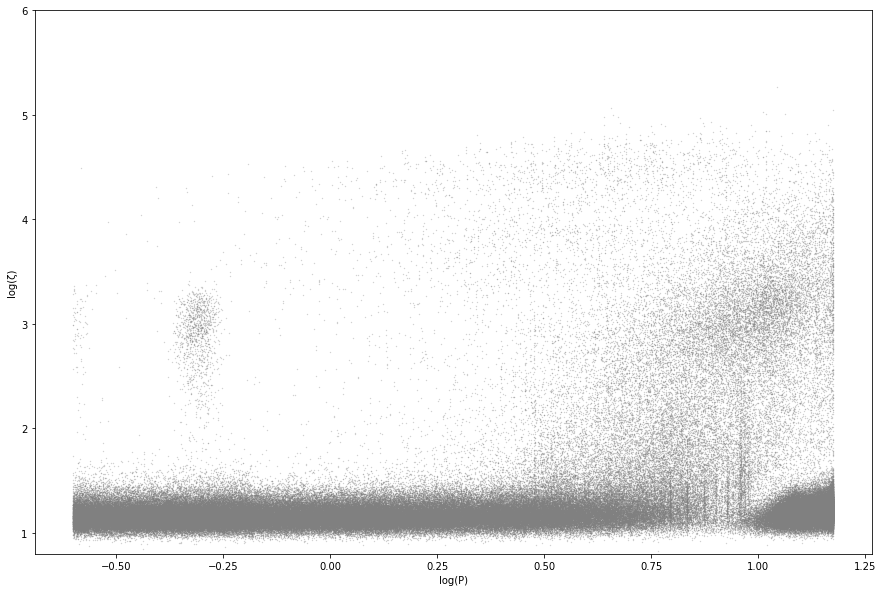

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15,10))
plt.ylim(0.8, 6)
plt.xlabel('log(P)')
plt.ylabel('log(ζ)')
plt.scatter(np.log10(df['period']), np.log10(df['zeta']), s=0.1, color='gray', alpha=0.5)
plt.show()

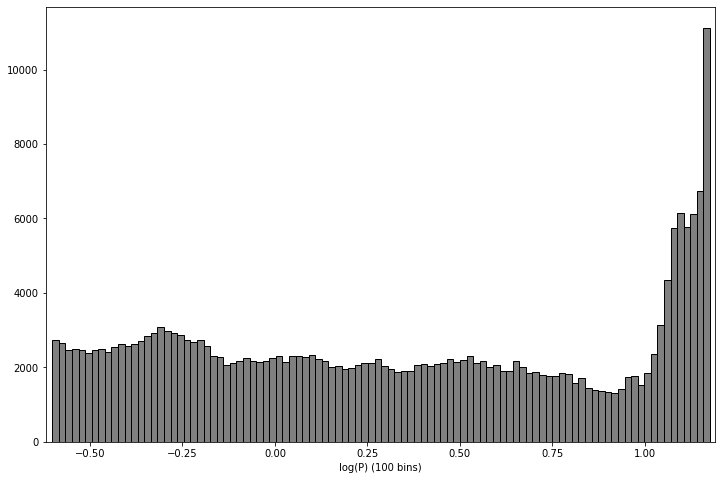

In [4]:
plt.figure(figsize=(12,8))
plt.xlim(-0.62, 1.19)
plt.xlabel('log(P) (100 bins)')
precuthist = plt.hist(np.log10(df['period']), bins=100, color='gray', edgecolor='black')
plt.show()

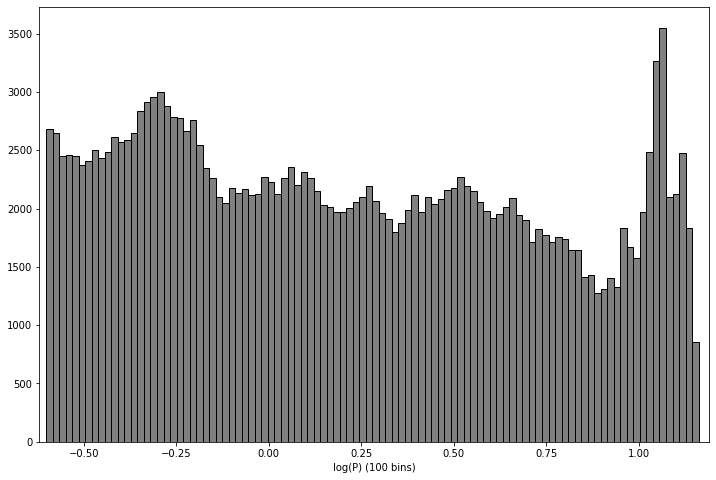

In [5]:
#cut periods appearing more than 50 times
periodstocut = df['period'].value_counts().head(1000).index.tolist()
df_commonperiodscut = df[~df['period'].isin(periodstocut)]
plt.figure(figsize=(12,8))
plt.xlim(-0.62, 1.19)
plt.xlabel('log(P) (100 bins)')
precuthist = plt.hist(np.log10(df_commonperiodscut['period']), bins=100, color='gray', edgecolor='black')
plt.show()

In [6]:
df_commonperiodscut.shape

(215871, 6)

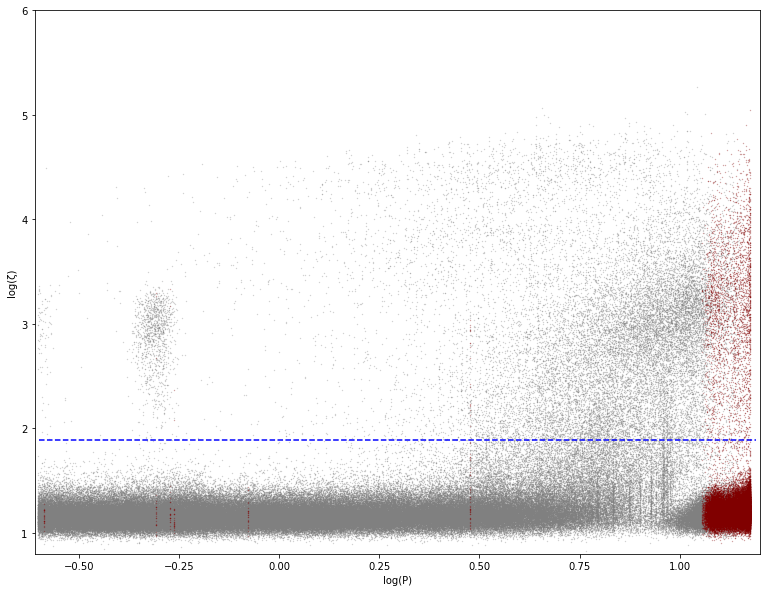

In [7]:
plt.figure(figsize=(13,10))
plt.ylim(0.8, 6)
plt.xlim(-0.61, 1.2)
plt.xlabel('log(P)')
plt.ylabel('log(ζ)')
plt.hlines(np.log10(df_commonperiodscut.iloc[int(df_commonperiodscut.shape[0]/10)]['zeta']), xmin=-0.6, xmax=1.19, linestyles="dashed", color='blue')
plt.scatter(np.log10(df_commonperiodscut['period']), np.log10(df_commonperiodscut['zeta']), s=0.1, color='gray', alpha=0.5)
plt.scatter(np.log10(df[df['period'].isin(periodstocut)]['period']), np.log10(df[df['period'].isin(periodstocut)]['zeta']), s=0.1, color='maroon', alpha=0.5)
plt.show()

In [8]:
df_knownobjectsomitted = df_commonperiodscut[~df_commonperiodscut['tid'].isin(tois+ebs)]
manual_examine_tids = []
manual_examine = pd.DataFrame(columns=['tid', 'period', 'zeta', 'deltchi2', 'kurtosis', 'sector'])
for row in df_knownobjectsomitted.iterrows():
    tid = int(row[1]['tid'])
    if tid not in manual_examine_tids:
        manual_examine_tids.append(tid)
        manual_examine = manual_examine.append({'tid':tid, 'period':row[1]['period'], 'zeta':row[1]['zeta'],
                                               'deltchi2':row[1]['deltchi2'], 'kurtosis':row[1]['kurtosis'],
                                               'sector': row[1]['sector']}, ignore_index=True)
    if len(manual_examine_tids) >= df_knownobjectsomitted.shape[0]/10:
        break
        
    if len(manual_examine_tids) % 500 == 0:
        print(len(manual_examine_tids))
print(len(manual_examine_tids))
print(manual_examine.shape)
manual_examine.head(10)

500
1000
1500
1500
2000
2500
3000
3500
3500
4000
4500
4500
4500
4500
4500
4500
4500
4500
5000
5500
6000
6000
6000
6500
6500
6500
7000
7500
7500
8000
8000
8000
8000
8500
9000
9500
10000
10000
10000
10500
11000
11500
12000
12500
13000
13000
13000
13500
14000
14000
14000
14000
14000
14500
15000
15000
15500
16000
16500
17000
17000
17000
17500
18000
18500
18500
19000
19500
20000
20500
21000
21392
(21392, 6)


,tid,period,zeta,deltchi2,kurtosis,sector
0,272551828.0,11.06230,185412.0,308140.000,7490.4200,3.0
1,468887783.0,4.52917,116034.0,8200.270,119.6170,5.0
2,167692429.0,10.28010,107016.0,1515.600,163.9280,12.0
3,284613090.0,11.55410,102265.0,2936.490,154.0180,7.0
4,382517745.0,10.44060,100560.0,485.817,182.0270,8.0
5,180412528.0,4.58691,99741.8,6508.670,88.1658,13.0
6,133701671.0,4.69519,95526.5,15540.200,142.1070,12.0
7,149573659.0,4.37339,94798.4,3701.940,127.6120,5.0
8,260502102.0,7.31582,93712.5,6170.890,102.8370,12.0
9,318825030.0,7.77727,85332.1,3732.270,80.0669,10.0


In [19]:
harmonics = pd.read_csv('harmonics.csv')
for row in harmonics.iterrows():
    tid = row[1]['tid']
    sector = manual_examine[manual_examine['tid'] == tid]['sector'].tolist()
    print(sector)

[11.0]
[11.0]
[5.0]
[5.0]
[7.0]
[4.0]
[4.0]
[4.0]
[8.0]
[8.0]
[13.0]
[12.0]
[3.0]
[3.0]
[6.0]
[4.0]
[13.0]
[13.0]
[7.0]
[4.0]
[4.0]
[9.0]
[2.0]
[2.0]
[2.0]
[5.0]
[2.0]
[4.0]
[4.0]
[4.0]
[3.0]
[5.0]
[6.0]
[6.0]
[3.0]
[3.0]
[6.0]
[6.0]
[2.0]
[4.0]
[2.0]
[5.0]
[5.0]
[5.0]
[5.0]
[5.0]
[5.0]
[5.0]
[5.0]
[8.0]
[7.0]
[7.0]
[11.0]
[7.0]
[12.0]
[7.0]
[7.0]
[7.0]
[7.0]
[10.0]
[5.0]
[6.0]
[9.0]
[9.0]
[10.0]
[9.0]
[10.0]
[10.0]
[12.0]
[7.0]
[9.0]
[3.0]
[12.0]
[5.0]
[5.0]
[5.0]
[5.0]
[5.0]
[9.0]
[13.0]
[8.0]
[6.0]
[4.0]
[8.0]
[7.0]
[3.0]
[13.0]
[4.0]
[12.0]
[11.0]
[5.0]
[6.0]
[11.0]
[6.0]
[9.0]
[5.0]
[12.0]
[2.0]
[13.0]
[1.0]
[9.0]
[2.0]
[3.0]
[9.0]
[13.0]
[7.0]
[13.0]
[13.0]
[1.0]
[1.0]
[3.0]
[10.0]
[5.0]
[6.0]
[7.0]
[7.0]
[6.0]
[3.0]
[13.0]
[6.0]
[5.0]
[7.0]
[4.0]
[13.0]
[2.0]
[2.0]
[5.0]
[5.0]
[5.0]
[6.0]
[9.0]
[4.0]
[12.0]
[7.0]
[4.0]
[4.0]
[8.0]
[6.0]
[3.0]
[3.0]
[11.0]
[4.0]
[1.0]
[12.0]
[5.0]
[6.0]
[5.0]
[6.0]
[13.0]
[2.0]
[8.0]
[6.0]
[13.0]
[10.0]
[12.0]
[2.0]
[2.0]
[2.0]
[6.0]
[6.0]
[5.0]


[6.0]
[11.0]
[13.0]
[10.0]
[10.0]
[7.0]
[13.0]
[1.0]


In [110]:
from shutil import copyfile
c = 1
for row in manual_examine.iterrows():
    print(str(c)+'/'+str(len(manual_examine_tids)))
    tid = row[1]['tid']
    sector = row[1]['sector']
    copyfile('TESSsector'+str(int(sector))+'/phasecurves/'+str(int(tid))+'.png', 'manualexamine/'+str(c)+'.png')
    c += 1

1/21392
2/21392
3/21392
4/21392
5/21392
6/21392
7/21392
8/21392
9/21392
10/21392
11/21392
12/21392
13/21392
14/21392
15/21392
16/21392
17/21392
18/21392
19/21392
20/21392
21/21392
22/21392
23/21392
24/21392
25/21392
26/21392
27/21392
28/21392
29/21392
30/21392
31/21392
32/21392
33/21392
34/21392
35/21392
36/21392
37/21392
38/21392
39/21392
40/21392
41/21392
42/21392
43/21392
44/21392
45/21392
46/21392
47/21392
48/21392
49/21392
50/21392
51/21392
52/21392
53/21392
54/21392
55/21392
56/21392
57/21392
58/21392
59/21392
60/21392
61/21392
62/21392
63/21392
64/21392
65/21392
66/21392
67/21392
68/21392
69/21392
70/21392
71/21392
72/21392
73/21392
74/21392
75/21392
76/21392
77/21392
78/21392
79/21392
80/21392
81/21392
82/21392
83/21392
84/21392
85/21392
86/21392
87/21392
88/21392
89/21392
90/21392
91/21392
92/21392
93/21392
94/21392
95/21392
96/21392
97/21392
98/21392
99/21392
100/21392
101/21392
102/21392
103/21392
104/21392
105/21392
106/21392
107/21392
108/21392
109/21392
110/21392
111/2139

In [54]:
for i, aliasrow in harmonics.iterrows():
    oldidx = 0
    for row in manual_examine[manual_examine['tid'] == aliasrow['tid']].iterrows():
        oldidx = row[0]
        break
    correcttid = int(manual_examine.iloc[oldidx-2]['tid'])
    harmonics.loc[i, 'tid'] = correcttid
    
harmonics

,tid,harmonic
0,365570620,3
1,198037741,4
2,201249189,14
3,198051336,7
4,453828066,1
...,...,...
1362,101845679,3
1363,406276109,1
1364,50758245,1
1365,251078096,6


In [61]:
sectors = []
for i, row in harmonics.iterrows():
    sector = 0
    for j, row in manual_examine[manual_examine['tid'] == row['tid']].iterrows():
        sectors.append(row['sector'])
        break
harmonics['sector'] = sectors

In [62]:
harmonics.to_csv('harmonics_corrected.csv')

In [151]:
#moving manually vetted WOIs to their own folder
upto = 3001
tids = []
for c in range(upto):
    try:
        tid = str(int(manual_examine.iloc[c+1]['tid']))
        copyfile('manualexamine/'+str(c)+'.png', 'woicandidates/'+tid+'.png')
        tids.append(tid)
        print(c)
    except:
        pass

f = open('aliases.csv', 'a')
intids = [int(x) for x in tids]
intids.sort()
tids = [str(x) for x in intids]
for tid in tids:
    f.write(tid+',\n')

f.close()

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
233
234
235
236
238
239
240
241
242
243
244
245
246
247
248
249
250
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284


In [16]:
manual_examine.iloc[1]['tid']

468887783.0

In [3]:
w = open('woicands.sh', 'w')
c = 1
total = harmonics.shape[0]
for i, row in harmonics.iterrows():
    tid = str(row['tid'])
    sector = int(row['sector'])
    f = open(f'../curlscripts/tesscurl_sector_{sector}_lc.sh', 'r')
    for line in f.readlines():
        if tid in line:
            w.write(line)
            f.close()
            print(f'{c}/{total}\n')
    c += 1
w.close()

1/1367

2/1367

3/1367

4/1367

5/1367

6/1367

7/1367

8/1367

9/1367

10/1367

11/1367

12/1367

13/1367

14/1367

15/1367

16/1367

17/1367

18/1367

19/1367

20/1367

21/1367

22/1367

23/1367

24/1367

25/1367

26/1367

27/1367

28/1367

29/1367

30/1367

31/1367

32/1367

33/1367

34/1367

35/1367

36/1367

37/1367

38/1367

39/1367

40/1367

41/1367

42/1367

43/1367

44/1367

45/1367

46/1367

47/1367

48/1367

49/1367

50/1367

51/1367

52/1367

53/1367

54/1367

55/1367

56/1367

57/1367

58/1367

59/1367

60/1367

61/1367

62/1367

63/1367

64/1367

65/1367

66/1367

67/1367

68/1367

69/1367

70/1367

71/1367

72/1367

73/1367

74/1367

75/1367

76/1367

77/1367

78/1367

79/1367

80/1367

81/1367

82/1367

83/1367

84/1367

85/1367

86/1367

87/1367

88/1367

89/1367

90/1367

91/1367

92/1367

93/1367

94/1367

95/1367

96/1367

97/1367

98/1367

99/1367

100/1367

101/1367

102/1367

103/1367

104/1367

105/1367

106/1367

107/1367

108/1367

109/1367

110/1367

111/1367

834/1367

835/1367

836/1367

837/1367

838/1367

839/1367

840/1367

841/1367

842/1367

843/1367

844/1367

845/1367

846/1367

847/1367

848/1367

849/1367

850/1367

851/1367

852/1367

853/1367

854/1367

855/1367

856/1367

857/1367

858/1367

859/1367

860/1367

861/1367

862/1367

863/1367

864/1367

865/1367

866/1367

867/1367

868/1367

869/1367

870/1367

871/1367

872/1367

873/1367

874/1367

875/1367

876/1367

877/1367

878/1367

879/1367

880/1367

881/1367

882/1367

883/1367

884/1367

885/1367

886/1367

887/1367

888/1367

889/1367

890/1367

891/1367

892/1367

893/1367

894/1367

895/1367

896/1367

897/1367

898/1367

899/1367

900/1367

901/1367

902/1367

903/1367

904/1367

905/1367

906/1367

907/1367

908/1367

909/1367

910/1367

911/1367

912/1367

913/1367

914/1367

915/1367

916/1367

917/1367

918/1367

919/1367

920/1367

921/1367

922/1367

923/1367

924/1367

925/1367

926/1367

927/1367

928/1367

929/1367

930/1367

931/1367

932/1367

933/1367



In [89]:
zetas = []
deltchi2s = []
kurtosiss = []
for i, row in harmonics.iterrows():
    tid = row['tid']
    for j, innerrow in manual_examine[manual_examine['tid']==tid].iterrows():
        zeta = innerrow['zeta']
        deltchi2 = innerrow['deltchi2']
        kurtosis = innerrow['kurtosis']
        break
    zetas.append(zeta)
    deltchi2s.append(deltchi2)
    kurtosiss.append(kurtosis)
harmonics['zeta'] = zetas
harmonics['deltchi2'] = deltchi2s
harmonics['kurtosis'] = kurtosiss
harmonics

,tid,harmonic,sector,period,zeta,deltchi2,kurtosis
0,365570620,3,6.0,2.57549,16903.60,3594.410,26.96140
1,198037741,4,5.0,3.12012,29734.30,589880.000,22.98820
2,201249189,14,2.0,3.29214,8723.72,212308.000,5.79621
3,198051336,7,4.0,4.49308,28819.40,448619.000,17.54980
4,453828066,1,4.0,9.13585,2674.86,458.662,40.46700
...,...,...,...,...,...,...,...
1362,101845679,3,13.0,3.84346,47214.60,36903.600,24.43010
1363,406276109,1,1.0,7.54742,3238.48,326.592,45.14150
1364,50758245,1,7.0,4.51485,20910.60,3543.060,66.13950
1365,251078096,6,4.0,3.50798,26702.10,488829.000,17.40720


In [90]:
harmonics.to_csv('harmonics_corrected.csv')

In [2]:
harmonics

,tid,harmonic,sector,period,zeta,deltchi2,kurtosis
0,468887783,1,5,4.52917,116034.00,8.200270e+03,119.61700
1,167692429,1,12,10.28010,107016.00,1.515600e+03,163.92800
2,284613090,1,7,11.55410,102265.00,2.936490e+03,154.01800
3,382517745,1,8,10.44060,100560.00,4.858170e+02,182.02700
4,180412528,1,13,4.58691,99741.80,6.508670e+03,88.16580
...,...,...,...,...,...,...,...
1362,244252435,1,5,0.94353,2627.75,2.459900e+04,33.93060
1363,455064763,14,5,4.14004,2627.75,1.283260e+07,3.58693
1364,23555025,1,10,4.74554,2620.66,2.342120e+02,35.90990
1365,362086333,16,12,4.52615,2614.30,9.336970e+03,5.41191
